In [1]:
## Import required Python modules
import matplotlib.pyplot as plt
import numpy as np
import scipy, scipy.stats
import io
import base64
#from IPython.core.display import display
from IPython.display import display, HTML, Image
from urllib.request import urlopen

## Customising the look of the notebook
## This custom file is adapted from https://github.com/lmarti/jupyter_custom/blob/master/custom.include
HTML('custom.css')
#HTML(urlopen('https://raw.githubusercontent.com/bretonr/intro_data_science/master/custom.css').read().decode('utf-8'))

In [2]:
HTML('''
<script>
    function toggleCodeCells() {
      var codeCells = document.querySelectorAll('.jp-CodeCell');

      codeCells.forEach(function(cell) {
        var inputArea = cell.querySelector('.jp-InputArea');
        if (inputArea) {
          var currentDisplay = inputArea.style.display || getComputedStyle(inputArea).display;
          inputArea.style.display = currentDisplay === 'none' ? '' : 'none';
        }
      });
    }
</script>

<!-- Add a button to toggle visibility of input code cells -->
<button onclick="toggleCodeCells()">Toggle Code Cells</button>
''')

In [3]:
HTML('''
<button id="toggleButton" onclick="toggleQueue()">Toggle Queue</button>

<script>
  var queueHidden = false;

  function toggleQueue() {
    var queueElements = document.querySelectorAll('div.queue');

    for (var i = 0; i < queueElements.length; i++) {
      if (queueHidden) {
        queueElements[i].style.display = 'block';
      } else {
        queueElements[i].style.display = 'none';
      }
    }

    queueHidden = !queueHidden;
  }
</script>
''')

<div class="queue">
    Lecture 1 - 00:00    --    Cover syllabus and general admin stuff first
</div>

## Syllabus

1. **Probabilities and interpretations**
2. Probability distributions
3. Parameter estimation
4. Maximum likelihood
5. Least square, chi2, correlations
6. Monte Carlo basics
7. Goodness of fit tests
8. Hypothesis testing
9. Probability and confidence level
10. Limit setting
11. Introduction to multivariate analysis techniques

# Chapter 1

## Topics

**[1.1 Probabilities and Interpretation](#1.1-Probabilities-and-Interpretation)**
- 1.1.1 Statistics and probabilities
- **Case study**: Cancer research breakthrough

**[1.2 Basics of presentation of data](#1.2-Basics-of-presentation-of-data)**
- ~~1.2.1 Data presentation~~ *(non-examinable content)*
- 1.2.2 Measures of central tendency
    - Arithmetic mean
    - Geometric mean
    - Harmonic mean
    - Root mean square
    - Median
    - Mode
- 1.2.3 Measures of dispersion
    - Variance and standard deviation
    - Mean absolute deviation
- 1.2.4 Other indicators
    - Skewness
    - Kurtosis
- 1.2.5 Multiple variables
    - Covariance
    - Correlation
    - Covariance matrix
- **Case study**: Correlation does not imply causation

## 1.1 Probabilities and Interpretation

### 1.1.1 Statistics and probabilities


#### Context

*Statistics is a tool*. [Barlow]

Statistics and data analysis form the building blocks of **data science**.

<div class="queue">
    Lecture 1 - 00:10
</div>

Example dataset
x = {4, 1, 3, 9, 5, 4, 4, 6, 2, 4, 7, 7, 4, 3, 2}

Binned data:
value:  0, 1, 2, 3, 4, 5, 6, 7, 8, 9
weight: 0, 1, 2, 2, 5, 1, 1, 2, 0, 1


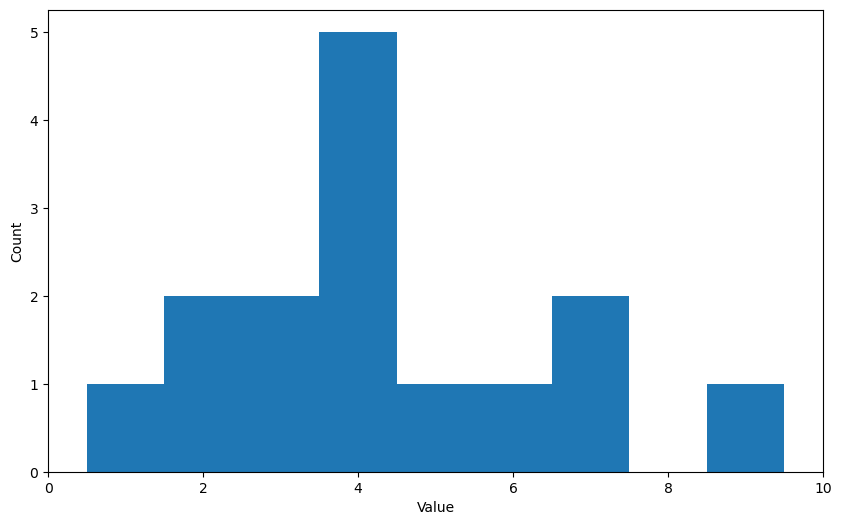

In [4]:
## Define a set of data
#x = np.random.poisson(4, size=15)
x = np.array([4, 1, 3, 9, 5, 4, 4, 6, 2, 4, 7, 7, 4, 3, 2])
print('Example dataset')
print('x = {' + ', '.join(['{}'.format(xi) for xi in x]) + '}')

fig,ax = plt.subplots(figsize=[10,6])
weights, bins, patches = ax.hist(x, range=[0,10], bins=10, align='left')
weights = weights.astype(int)
bins = bins[:-1].astype(int)
ax.set_xlabel('Value')
ax.set_ylabel('Count')
ax.set_xlim([0,10]);

print('')
print('Binned data:')
print('value:  ' + ', '.join(['{}'.format(b) for b in bins]))
print('weight: ' + ', '.join(['{}'.format(w) for w in weights]))

<div class="queue">
    Lecture 1 - 00:15
</div>

## 1.2 Basics of presentation of data

### 1.2.1 Data presentation

#### Description of data

Two types of data:
- Qualitative / non-numeric: e.g. food preference
- Quantitative / numeric: e.g. length of an object

Quantitative data divided into two subtypes:
- Discrete: e.g. number of photons detected
- Continuous: e.g. mass of galaxies

<div class="queue">
    Lecture 1 - 00:20
</div>

### 1.2.2 Measures of central tendency

Useful to describe a dataset/distribution with a single number.

We define a dataset containing N elements as:

\begin{equation}
  S = \{x_1, x_2, x_3,...,x_N\}
\end{equation}

#### Arithmetic mean
Also called mean or average:
\begin{equation}
    \langle x \rangle = \frac{1}{N} \sum_{i=1}^{N} x_i
\end{equation}

#### Geometric mean
Average side length of hyper-volume
\begin{equation}
    {\rm GM} = \left( \prod_{i=1}^{N} x_i \right)^{\frac{1}{N}}
\end{equation}

Also referred to log-average:
\begin{equation}
  {\rm GM} = \left( \prod_{i=1}^{N} x_i \right)^{\frac{1}{N}} = \exp \left[ \frac{1}{N} \sum_{i=1}^{N} \ln x_i \right]
\end{equation}

_**Note:**_ More numerically stable.

#### Harmonic mean
\begin{equation}
    H = \frac{N}{\sum_{i=1}^{N} \frac{1}{x_i}}
\end{equation}

Harmonic mean, H, is a Schur-concave function:
\begin{equation}
  \min(x_1,...,x_N) \leq H \leq N \min(x_1,...,x_N) .
\end{equation}

#### Root mean square
\begin{equation}
    {\rm RMS} = \sqrt{\frac{\sum_{i=1}^{N} x_i^2}{N}}
\end{equation}